<a href="https://colab.research.google.com/github/cpenalozaj/Equipo35_MLOps/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip3 install -U ucimlrepo

**Dataset Information**



In [19]:
# Cargando las librerías
import os
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

import matplotlib.pyplot as plt
import seaborn as sns

#from google.colab import drive # Se utiliza para conectarse con drive y leer los archivos del mismo

In [20]:
# Montamos el drive, para poder acceder al archivo del dataset
#drive.mount('/content/drive')

In [21]:
# Definimos el folder donde se encuentran los datos
#data_folder =

In [22]:
# Importamos el dataset
student_data = fetch_ucirepo(name='Student Academics Performance')

In [23]:
student_data

{'data': {'ids': None,
  'features':     ge   cst   tnp   twp   iap   esp arr         ms ls    as     fmi       fs  fq  mq        fo         mo       nf       sh       ss   me       tt      atd
  0    F     G  Good  Good    Vg  Good   Y  Unmarried  V  Paid  Medium  Average  Um  10    Farmer  Housewife    Large     Poor     Govt  Asm    Small     Good
  1    M   OBC    Vg    Vg    Vg    Vg   N  Unmarried  V  Paid     Low  Average  Um  Il   Service    Service    Small     Poor     Govt  Asm  Average  Average
  2    F   OBC  Good  Good    Vg  Good   N  Unmarried  V  Paid      Am  Average  12  10   Service  Housewife  Average  Average     Govt  Asm    Large     Good
  3    M  MOBC  Pass  Good    Vg  Good   N  Unmarried  V  Paid  Medium    Small  12  Um  Business   Business    Large     Poor     Govt  Asm  Average  Average
  4    M     G  Good  Good    Vg    Vg   N  Unmarried  V  Paid      Am  Average  10  12   Service  Housewife    Large     Poor  Private  Asm    Small     Good
  ..  ..   

In [24]:
# Data (as pandas dataframes)
X = student_data.data.features
y = student_data.data.targets

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(X.head())

  ge   cst   tnp   twp iap   esp arr         ms ls    as     fmi       fs  fq  mq        fo         mo       nf       sh       ss   me       tt      atd
0  F     G  Good  Good  Vg  Good   Y  Unmarried  V  Paid  Medium  Average  Um  10    Farmer  Housewife    Large     Poor     Govt  Asm    Small     Good
1  M   OBC    Vg    Vg  Vg    Vg   N  Unmarried  V  Paid     Low  Average  Um  Il   Service    Service    Small     Poor     Govt  Asm  Average  Average
2  F   OBC  Good  Good  Vg  Good   N  Unmarried  V  Paid      Am  Average  12  10   Service  Housewife  Average  Average     Govt  Asm    Large     Good
3  M  MOBC  Pass  Good  Vg  Good   N  Unmarried  V  Paid  Medium    Small  12  Um  Business   Business    Large     Poor     Govt  Asm  Average  Average
4  M     G  Good  Good  Vg    Vg   N  Unmarried  V  Paid      Am  Average  10  12   Service  Housewife    Large     Poor  Private  Asm    Small     Good


In [26]:
#print(y.head())
print(y)

None


In [27]:
# Revisamos la metadata
print(student_data.metadata)

{'uci_id': 467, 'name': 'Student Academics Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/467/student+academics+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/467/data.csv', 'abstract': 'The dataset tried to find the end semester percentage prediction based on different social, economic and academic attributes. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 300, 'num_features': 22, 'feature_types': [], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C50W30', 'creators': ['Sadiq Hussain'], 'intro_paper': {'ID': 455, 'type': 'NATIVE', 'title': 'Educational Data Mining and Analysis of Students’ Academic Performance Using WEKA', 'authors': 'Sadiq Hussain, N. A. Dahan, F. Ba-Alwi, Najoua Ribata', 'venue': ' Indonesian Jo

In [28]:
# Revisamos la information de las variables
print(student_data.variables)

   name     role         type demographic description units missing_values
0    ge  Feature  Categorical        None        None  None             no
1   cst  Feature  Categorical        None        None  None             no
2   tnp  Feature  Categorical        None        None  None             no
3   twp  Feature  Categorical        None        None  None             no
4   iap  Feature  Categorical        None        None  None             no
5   esp  Feature  Categorical        None        None  None             no
6   arr  Feature  Categorical        None        None  None             no
7    ms  Feature  Categorical        None        None  None             no
8    ls  Feature  Categorical        None        None  None             no
9    as  Feature  Categorical        None        None  None             no
10  fmi  Feature  Categorical        None        None  None             no
11   fs  Feature  Categorical        None        None  None             no
12   fq  Feature  Categor

# Dada la información obtenida en la revisión de las variables, se puede notar que todas son categóricas.

In [29]:
# Concatenamos ambos datasets (feature y target)
student_data_df = pd.concat([X, y], axis = 1)
student_data_df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,Medium,Average,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,Low,Average,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,Am,Average,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,Medium,Small,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,Am,Average,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


In [30]:
# Generamos la ruta en donde se almacenará
# directory = r'D:\ITESM\MNA-MLOps-Main\MLOps-private\data\raw'
directory = 'Equipo35_MLOps\data\raw'
file_path = os.path.join(directory, 'student_data_df.csv')

os.makedirs(directory, exist_ok=True)

In [31]:
#  Guardamos el dataset completo
student_data_df.to_csv(file_path, index=False)

In [32]:
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ge      131 non-null    object
 1   cst     131 non-null    object
 2   tnp     131 non-null    object
 3   twp     131 non-null    object
 4   iap     131 non-null    object
 5   esp     131 non-null    object
 6   arr     131 non-null    object
 7   ms      131 non-null    object
 8   ls      131 non-null    object
 9   as      131 non-null    object
 10  fmi     131 non-null    object
 11  fs      131 non-null    object
 12  fq      131 non-null    object
 13  mq      131 non-null    object
 14  fo      131 non-null    object
 15  mo      131 non-null    object
 16  nf      131 non-null    object
 17  sh      131 non-null    object
 18  ss      131 non-null    object
 19  me      131 non-null    object
 20  tt      131 non-null    object
 21  atd     131 non-null    object
dtypes: object(22)
memory usage

In [33]:
student_data_df.describe()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,5,3,6,6,5,5,3,3,2,4,3,3
top,M,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,Medium,Small,Um,Um,Service,Housewife,Large,Average,Govt,Eng,Small,Good
freq,72,57,59,65,63,54,78,131,92,76,63,89,40,52,38,115,58,59,91,62,78,56


In [34]:
#student_data_df = student_data_df.drop('City', axis=1)

In [35]:
student_data_df.columns

Index(['ge', 'cst', 'tnp', 'twp', 'iap', 'esp', 'arr', 'ms', 'ls', 'as', 'fmi',
       'fs', 'fq', 'mq', 'fo', 'mo', 'nf', 'sh', 'ss', 'me', 'tt', 'atd'],
      dtype='object')

# **Verificación de valores erróneos y nulos**

In [36]:
#Verificamos valores erróneos
student_data_df.isna().sum()

,0
ge,0
cst,0
tnp,0
twp,0
iap,0
esp,0
arr,0
ms,0
ls,0
as,0


In [37]:
#Verificamos valores nulos
student_data_df.isnull().sum()

,0
ge,0
cst,0
tnp,0
twp,0
iap,0
esp,0
arr,0
ms,0
ls,0
as,0


Se logró identificar que no se presentan valores erróneos ni nulos

# **Análisis univariante**

In [38]:
sns.set(style="whitegrid")

# Seleccionamos las columnas con variables numéricas para las gráficas de distribución
#numerical_cols = student_data_df.select_dtypes(include=['number']).columns
numerical_cols = student_data_df.select_dtypes(include=['int64']).columns

# Procedemos a graficar las distribuciones de las variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(student_data_df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

<Figure size 1500x1000 with 0 Axes>

In [39]:
# Con las variables numéricas se procede a realizar la matriz de correlación

# Se calcula la matriz de correlación
#correlation_matrix = student_data_df[numerical_cols].corr()

# Aquí se dibuja para mejor interpretación
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix of Numerical Variables')
#plt.show()

# **Variables categóricas**

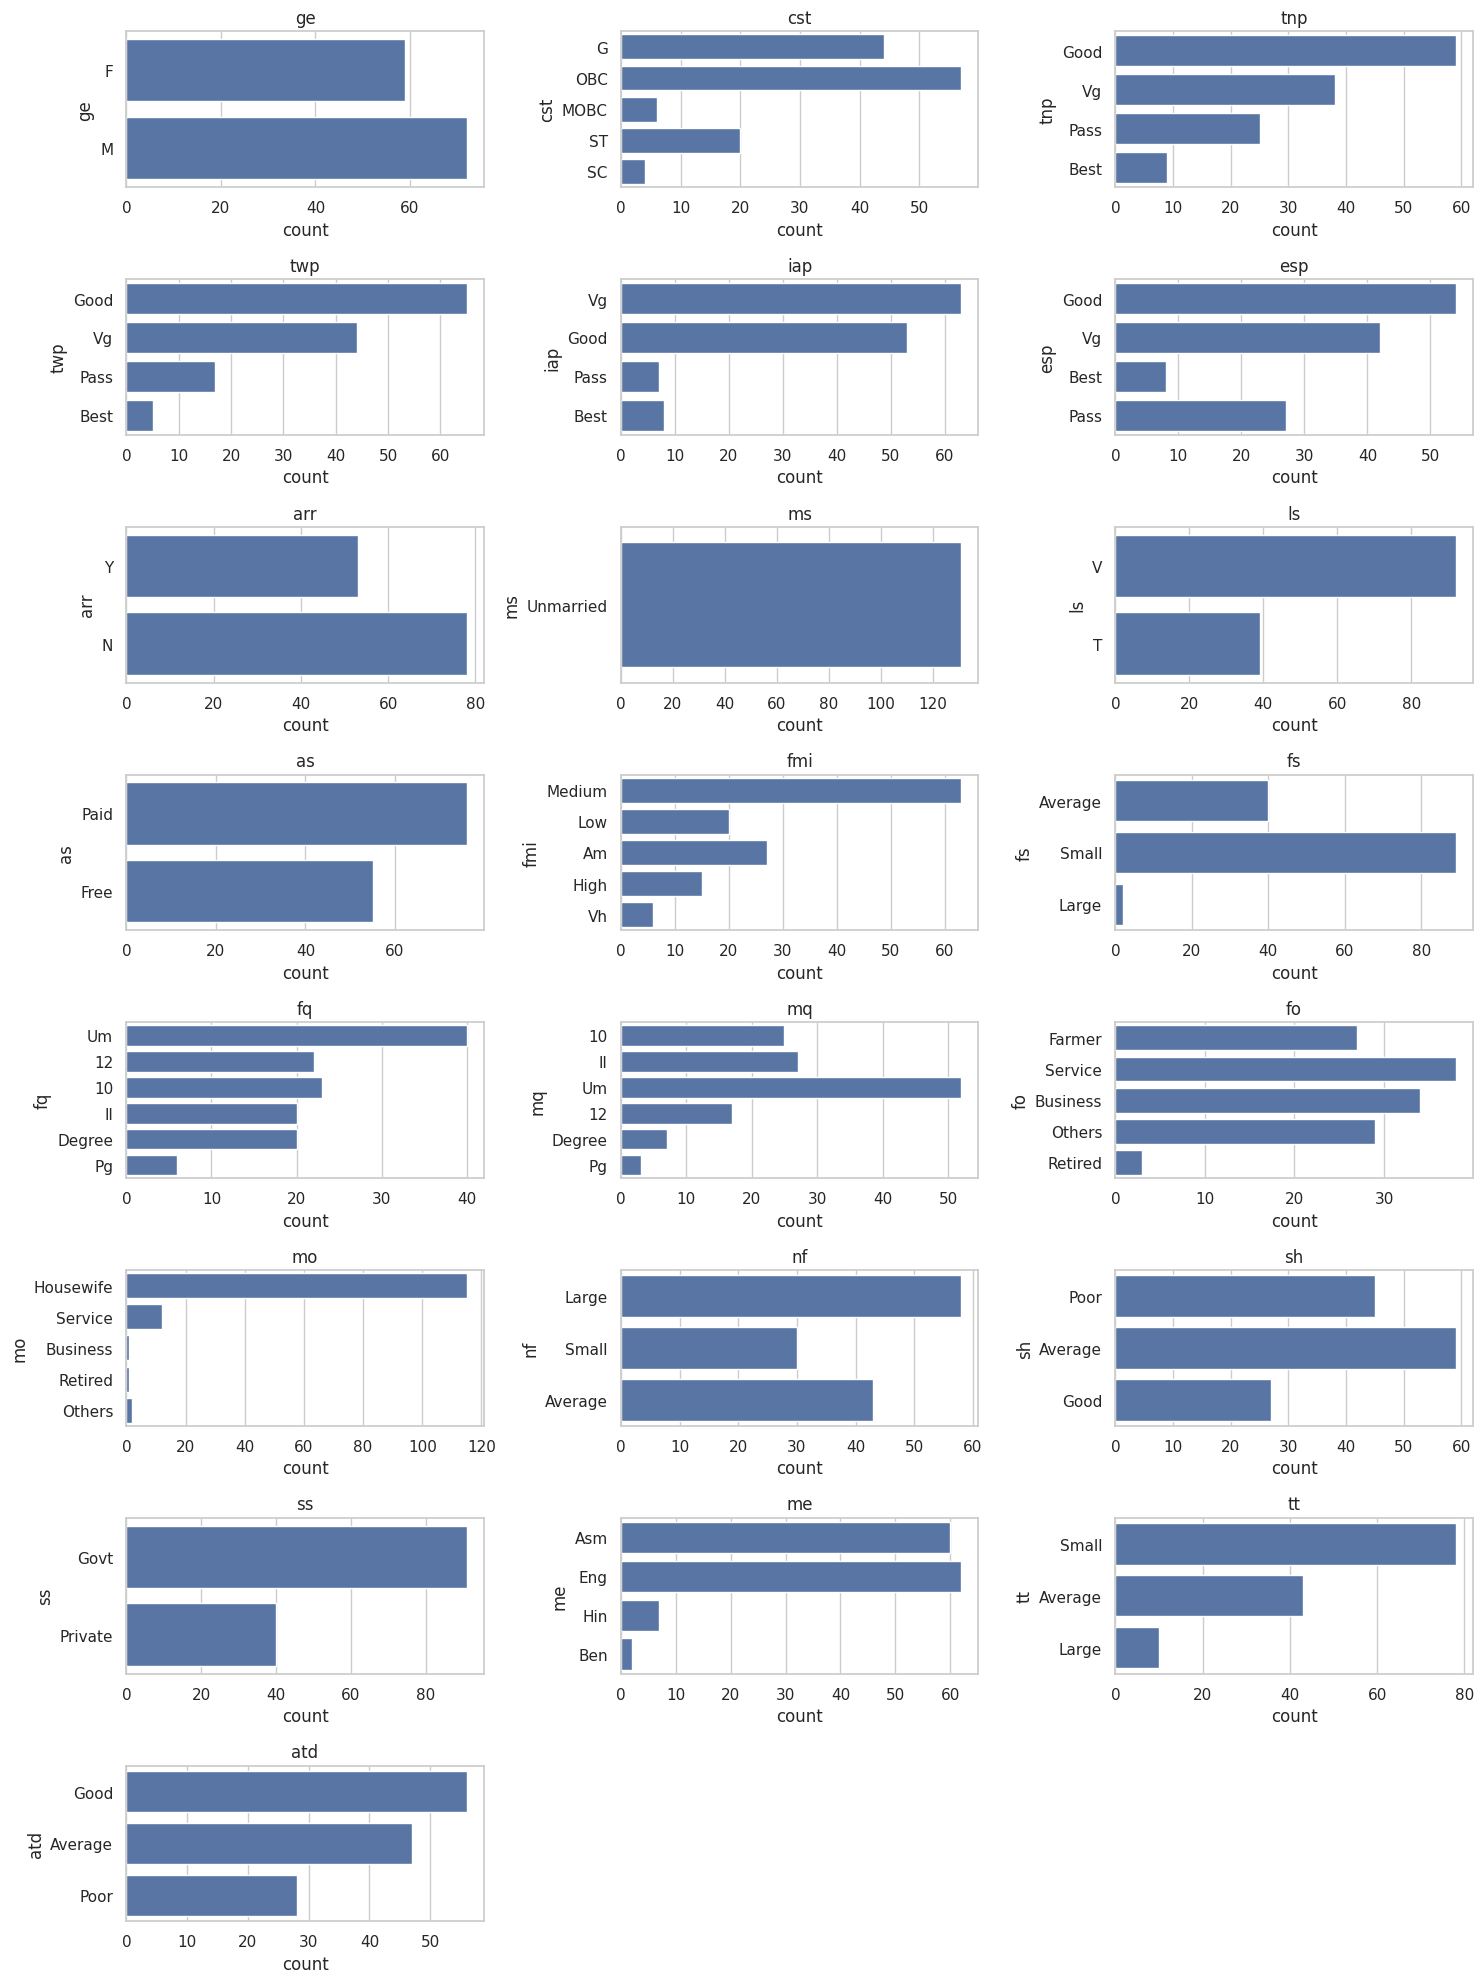

In [40]:
# Seleccionamos las columnas con variables categóricas para las gráficas de distribución
categorical_cols = student_data_df.select_dtypes(include=['object']).columns

# Procedemos a graficar las distribuciones de las variables categóricas
plt.figure(figsize=(15, 20))

# Para obtener una mejor distribución de las gráficas se calcula el número de filas y columnas
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.countplot(y=student_data_df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()